In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [6]:
df = pd.read_csv('C:/Users/Anirudh MV/Downloads/bank-full.csv',delimiter=';')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

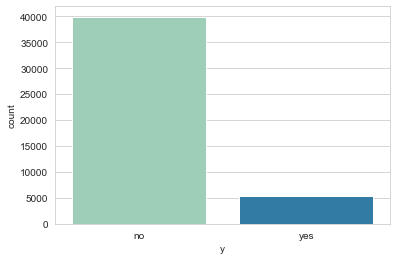

In [8]:
sns.set_style('whitegrid')
sns.countplot(df.y, palette='YlGnBu')

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

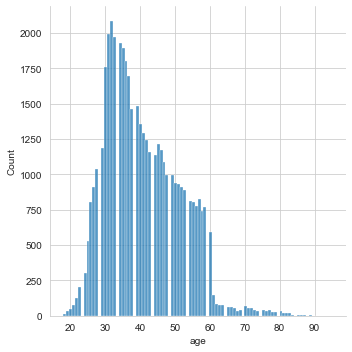

In [10]:
sns.displot(df.age ,kde=False)

C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


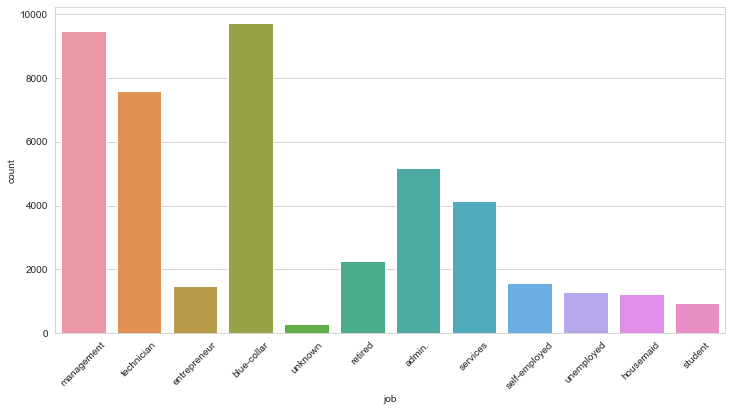

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df.job)
plt.xticks(rotation = 45)
plt.show()

C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

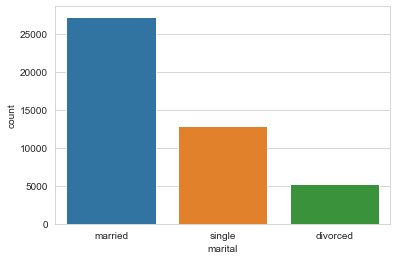

In [13]:
sns.countplot(df.marital)

C:\Users\Anirudh MV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

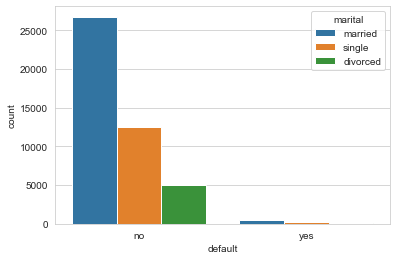

In [15]:
sns.countplot(df.default, hue=df.marital)

In [16]:
df = df.drop(['contact', 'day','month','duration','pdays','previous','poutcome'],axis=1)

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,1,no
1,44,technician,single,secondary,no,29,yes,no,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,no
4,33,unknown,single,unknown,no,1,no,no,1,no


In [20]:
#import sklearn preprocessing labelencoder to fit the data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [21]:
#fit_transform data imndividually
#job
df['job']=lab.fit_transform(df['job'])
#marital
df['marital']=lab.fit_transform(df['marital'])
#education
df['education']=lab.fit_transform(df['education'])
#default
df['default']=lab.fit_transform(df['default'])
#housing
df['housing']=lab.fit_transform(df['housing'])
#loan
df['loan']=lab.fit_transform(df['loan'])
#y
df['y']=lab.fit_transform(df['y'])

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,4,1,2,0,2143,1,0,1,0
1,44,9,2,1,0,29,1,0,1,0
2,33,2,1,1,0,2,1,1,1,0
3,47,1,1,3,0,1506,1,0,1,0
4,33,11,2,3,0,1,0,0,1,0


In [23]:
X = df.drop('y', axis = 1)
y = df['y']

In [24]:
from sklearn.model_selection import train_test_split


In [28]:
X_test, X_train,y_test,y_train= train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()

In [32]:
log.fit(X_train,y_train)

C:\Users\Anirudh MV\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.353530
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 9043
Model:                          Logit   Df Residuals:                     9034
Method:                           MLE   Df Model:                            8
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                 0.03987
Time:                        14:23:28   Log-Likelihood:                -3197.0
converged:                       True   LL-Null:                       -3329.7
Covariance Type:            nonrobust   LLR p-value:                 8.895e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0228      0.002    -12.448      0.000      -0.026      -0.019
job           -0.0064      0.

In [35]:
pred = log.predict(X_test)

In [36]:
log.score(X_test,y_test)

0.883847600088476

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [39]:
confusion_matrix(y_test,pred)

array([[31963,     7],
       [ 4194,     4]], dtype=int64)

In [40]:
accuracy_score(y_test,pred)

0.883847600088476

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     31970
           1       0.36      0.00      0.00      4198

    accuracy                           0.88     36168
   macro avg       0.62      0.50      0.47     36168
weighted avg       0.82      0.88      0.83     36168



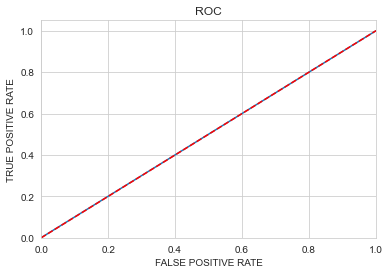

In [42]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,pred)
roc_auc = roc_auc_score(y_test,pred)
plt.figure()
plt.plot(fpr, tpr,label= 'Logistic Regression Sensitivity = %0.3f' %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC')
plt.show()